# Text Pre-processing of book content which includes:
1. Conversion to lowercase and removal of space characters by stripping sentences
2. Removing the stopwords and stemming
3. Generating tokens for the sentences using tensorflow

In [ ]:
%pip install python-dotenv
%pip install nltk
%pip install tensorflow_hub --user
%pip install gensim

In [ ]:
import tensorflow as  tf
import pandas as pd
import re
import math
import os
from dotenv import load_dotenv
import sys
load_dotenv()
path=os.getenv("dir_path")
file_path=os.getenv("file_path")
import utils_text_preproc as ut
#from utils_text_preproc import *
from nltk.corpus import stopwords
import nltk
from importlib import reload 
import inspect
import string
#reload('utils_text_preproc')
from tensorflow_hub import KerasLayer
import numpy as np
import glob
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
sys.path
sys.path.append(path+'\\utils_text_preproc.py')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import random
import warnings
warnings.filterwarnings("ignore")
import sklearn
print('The scikit-learn versionis {}.'.format(sklearn.__version__))

# Text Representation:
The computer understands text in addition to reading - vectors

How to turn text into numbers to retain meaning? e.g. ASCII or Morse code vectors generated could be huge and don't include a relationship between words

1. One hot encoding - doesn't include the relationship between words and gives a sparse representation (high dimensional)
2. Bag-of -words -collect the words to form a vocabulary or dictionary. It captures some semantic similarities of texts. It is high dimensional and provides sparse representation
3. The two major problems with OHE and Bag of words are associated with sparse representation matrix and lack of relationship between the words
4. Word Embedding- describing a word based on quantitative measurements for instance the word "Mirror" - can be described by the word properties nature, origin, sense of belonging, excitement, trust. The technique used to encode text into meaningful vectors - low dimensional and dense vectors. Vectors convey the semantic similarity between the words.ing a word based on quantitative measurements for instance the word "Mirror" - can be described by the word properties nature, origin, sense of belonging, excitement, trust. The technique used to encode text into meaningful vectors - low dimensional and dense vectors. Vectors convey the semantic similarity between the words.

In [28]:
os.listdir(path)

['.env',
 '.git',
 '.gitignore',
 '8_Maths_hemh101.txt',
 '8_Maths_hemh102.txt',
 '8_Maths_hemh103.txt',
 '8_Maths_hemh1ps.txt',
 'CBSE_TextBook_pdf',
 'CBSE_TextBook_txt',
 'Debug code.py',
 'main_folder.zip',
 'OCR_read_pdf_files.ipynb',
 'out_text.txt',
 'README.md',
 'Tensors and Types.ipynb',
 'Text_pre_processing.ipynb',
 'tf-data-pipelines-image-text.ipynb',
 'train_thumbnails',
 'train_thumbnails.zip',
 'utils_text_preproc.py',
 '__pycache__']

In [ ]:
f='CBSE_TextBook_txt'
txt_files = glob.glob(path+"/CBSE_TextBook_txt/*.txt") #os.listdir(os.path.join(path, f))   #for f in os.listdir(path) if f.endswith('.txt')]
print(txt_files)

In [42]:
txt_files[0].split("\\")[-1].split('.')[0]

'10_Maths_jemh101'

In [45]:
# Preprocess the sentences
# To do - add a labeling column
sentences = [] #the list has to be modified
labels=[]
for file_path in txt_files:
    name_file=file_path.split("\\")[-1].split('.')[0]
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:   
            processed_line=ut.preprocess_sentence(line)
            processed_line = " ".join([word for word in processed_line.split() if word not in stopwords.words('english')])
            if len(processed_line)>1:
                            sentences.append(processed_line)
                            labels.append(name_file)
sentences

['real numbers',
 '. introduction',
 'class ix , began exploration world real numbers encountered',
 'irrational numbers . continue discussion real numbers chapter .',
 'begin two important properties positive integers sections . . ,',
 'namely euclid division algorithm fundamental theorem arithmetic .',
 'euclid division algorithm , name suggests , divisibility',
 'integers . stated simply , says positive integer divided another positive',
 'integer b way leaves remainder r smaller b . many',
 'probably recognise usual long division process . although result quite',
 'easy state understand , many applications related divisibility properties',
 'integers . touch upon , use mainly compute hcf',
 'two positive integers .',
 'fundamental theorem arithmetic , hand , something',
 'multiplication positive integers . already know every composite number',
 'expressed product primes unique way important fact',
 'fundamental theorem arithmetic . , result easy state',
 'understand , deep signific

### Converting data into tf datasets 

1. Followed by - padding to ensure the length of the dataset , followed by glove embedding 

2. Maybe text to text search label has to be there for the purpose of knowing the chapter and the subject being tagged

3. Perform clustering based on word embedding

#To do break the sentences into further chunks

In [48]:
# Create a custom standardization function to remove punctuations and create word embedding'.


NNLM = "https://tfhub.dev/google/nnlm-en-dim50/2"

nnlm_module = KerasLayer(
    NNLM, output_shape=[50], input_shape=[], dtype=tf.string, trainable=True) ## The padding is automatically performed 

def text_vect(input_data):
  
    input_string= tf.strings.regex_replace(input_data,
                                  '[%s]' % re.escape(string.punctuation), '')
    nnlm_vector=nnlm_module(input_string)
    return nnlm_vector
    

#dataset=dataset.map(custom_standardization)

lst_1=[]

for row in text_vect(sentences):
        #print(row)
        lst_1.append(row.numpy())

result_ndarray=np.array(lst_1)

In [49]:
result_ndarray.shape

(128151, 50)

In [55]:
result_ndarray[100]

array([ 0.14487317, -0.21141599,  0.21420643, -0.01110489, -0.27667183,
        0.11522023, -0.132626  , -0.05611531,  0.05516594,  0.06634853,
        0.07258545, -0.01610897,  0.10939465, -0.33736387, -0.06379058,
        0.04767202,  0.10308506, -0.06792564,  0.02138046, -0.04419198,
       -0.08154688,  0.17298715,  0.14813866,  0.08176464, -0.15271258,
        0.15530892,  0.00571147, -0.20743237, -0.13819624, -0.12031533,
       -0.12860453,  0.04842828,  0.3631435 ,  0.01513725,  0.03571955,
       -0.3187368 ,  0.04154919, -0.23978285, -0.07285514,  0.03914569,
       -0.05051504,  0.45322323,  0.16183074,  0.12113671,  0.17545408,
       -0.16960654,  0.22552456,  0.16295125,  0.19590822,  0.22850865],
      dtype=float32)

In [64]:
from sklearn.preprocessing import StandardScaler
result_ndarray.min()

-1.1958201

In [67]:
clust_df= pd.DataFrame(result_ndarray) #Turning ndarray into pandas dataframe
clust_df.head()
scaled_word_embed = StandardScaler().fit_transform(clust_df)


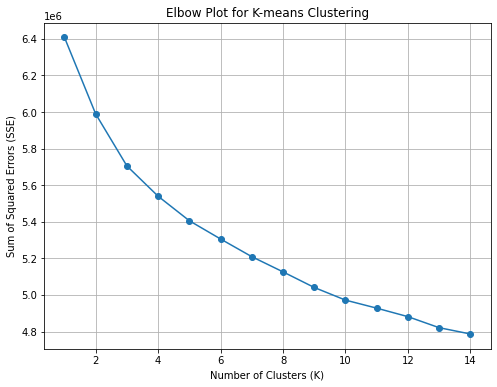

In [69]:
k_values = range(1, 15)  # Choose a range of cluster numbers
sse = []  # Sum of squared errors (SSE) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_word_embed)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Plot for K-means Clustering")
plt.grid(True)
plt.show()


In [70]:

optimal_k = 14  # Example: Choose the "elbow" point from the plot

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(scaled_word_embed)


word_clusters = final_kmeans.labels_ # Get cluster assignments for each word    

word_clusters #rename to topic clusters


array([ 9,  4,  9, ...,  4, 11, 11])

In [110]:
clust_df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,clus,labels,cluster_labels,books
0,-0.128673,-0.048473,0.096077,-0.123127,-0.167773,-0.079766,0.214127,-0.071958,-0.008030,0.107678,...,0.333628,-0.056949,-0.031091,-0.012128,0.210044,0.284527,9,10_Maths_jemh101,9,10_Maths_jemh101
1,-0.266310,-0.136085,-0.021087,-0.142163,-0.270561,-0.014810,-0.131955,0.015184,-0.180665,-0.097656,...,0.094699,-0.040690,0.038195,-0.114667,-0.009122,0.333676,4,10_Maths_jemh101,4,10_Maths_jemh101
2,-0.083443,-0.403168,0.064476,-0.152038,-0.042552,-0.093013,0.150297,0.325495,-0.249726,0.036610,...,0.323257,-0.298866,0.040311,0.133735,0.473279,0.092184,9,10_Maths_jemh101,9,10_Maths_jemh101
3,0.020858,0.027253,0.123989,-0.340238,-0.072889,-0.098494,0.071755,0.054908,0.145903,0.139017,...,0.308955,-0.111801,-0.208343,-0.048351,0.636794,0.096509,4,10_Maths_jemh101,4,10_Maths_jemh101
4,-0.078817,-0.182398,-0.023768,0.048632,-0.146563,0.119925,0.115951,0.292178,-0.091968,0.226705,...,0.200401,-0.162229,-0.023665,-0.029722,0.403528,-0.070453,9,10_Maths_jemh101,9,10_Maths_jemh101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128146,-0.000495,0.019758,0.065301,-0.246080,-0.240949,0.032047,-0.119017,0.191814,-0.502132,0.097223,...,0.104846,-0.198121,0.033278,0.081050,0.213118,0.144668,4,9_Maths_iemh1ps,4,9_Maths_iemh1ps
128147,0.107187,-0.047367,0.071399,0.089362,-0.108192,-0.048236,-0.109062,0.090359,0.111259,0.117256,...,0.126988,-0.317204,-0.042577,-0.028365,0.200722,0.039884,4,9_Maths_iemh1ps,4,9_Maths_iemh1ps
128148,-0.252122,-0.038866,-0.128058,0.177182,-0.180579,0.063572,-0.091067,0.093550,-0.202508,0.022977,...,0.064299,-0.089277,-0.308631,-0.134099,0.404135,-0.204806,4,9_Maths_iemh1ps,4,9_Maths_iemh1ps
128149,0.241329,-0.093680,-0.173816,-0.156319,-0.298324,-0.047958,-0.078864,0.075062,0.107552,0.110205,...,-0.018867,-0.304422,-0.105305,0.126554,-0.162945,0.170706,11,9_Maths_iemh1ps,11,9_Maths_iemh1ps


In [114]:
clust_df=clust_df.drop(columns=["labels","clus"])
clust_df.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33,               34,               35,
                     36,               37,               38,               39,
                     40,               41,               42,               43,
                     44,               45,               46,               47,
                     48,               49, 'cluster_

In [107]:
# Print word-cluster assignments
#for word, cluster in zip(word_vectors.index, word_clusters):
 #   print(f"{word}: Cluster {cluster}")
clust_df["cluster_labels"]=word_clusters
clust_df['books']=labels

In [115]:
selected_cluster=10
cluster_data =clust_df [clust_df['cluster_labels'] == selected_cluster]

"""

"""

'\nrandom_row_index = np.random.randint(len(cluster_data)) #randomly select \nrandom_row = cluster_data[random_row_index]\n\n# Calculate distances between the random row and all other rows in the cluster\ndistances = pairwise_distances([random_row], cluster_data, metric=\'euclidean\')[0]\n\n# Sort distances and pick the top 5 closest rows\nsorted_indices = np.argsort(distances)\ntop_5_indices = sorted_indices[:5]\ntop_5_closest_rows = cluster_data[top_5_indices]\n\n# Print the top 5 closest rows\nprint("Top 5 closest rows:")\nfor row in top_5_closest_rows:\n    print(row)\n'

### Performing dimensionality reduction using PCA and then plotting the clusters


In [118]:
colnames_list=clust_df.columns
colnames_list

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33,               34,               35,
                     36,               37,               38,               39,
                     40,               41,               42,               43,
                     44,               45,               46,               47,
                     48,               49, 'cluster_

In [128]:
##Creating the  X and Y 
X = scaled_word_embed #clust_df[colnames_list[0:len(colnames_list)-2]]
y = clust_df['cluster_labels']
target_names = np.sort(y.unique())
target_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [129]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,...,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05,1.281510e+05
mean,7.144130e-10,-3.810202e-09,-7.739474e-10,-7.858542e-09,-2.857652e-09,-5.715304e-09,-1.905101e-09,9.525506e-10,4.524615e-09,4.762753e-09,...,1.905101e-09,1.285943e-08,9.525506e-10,5.715304e-09,-9.525506e-10,-4.405547e-09,1.905101e-08,1.905101e-09,1.047806e-08,-4.762753e-09
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-6.436024e+00,-5.028843e+00,-4.953435e+00,-5.965655e+00,-4.361825e+00,-6.162248e+00,-3.947870e+00,-4.228473e+00,-4.986970e+00,-3.729460e+00,...,-3.900257e+00,-4.211033e+00,-5.511251e+00,-6.460748e+00,-4.834721e+00,-3.848292e+00,-5.477946e+00,-4.196143e+00,-4.104832e+00,-4.033954e+00
25%,-6.041728e-01,-6.700331e-01,-6.782029e-01,-6.734101e-01,-7.016318e-01,-6.217437e-01,-6.949937e-01,-6.444402e-01,-6.745685e-01,-6.440914e-01,...,-6.778459e-01,-7.227975e-01,-6.985152e-01,-6.495140e-01,-6.657231e-01,-6.620650e-01,-6.520401e-01,-6.452596e-01,-6.583448e-01,-7.088118e-01
50%,7.438058e-02,4.795106e-03,3.513045e-02,-2.043527e-02,-5.853651e-03,-1.168446e-02,-3.394351e-02,-2.238629e-02,1.349012e-02,-2.919298e-02,...,7.963795e-04,-2.641100e-02,8.150586e-03,4.923518e-02,-2.573054e-02,-2.597016e-02,5.748448e-03,3.185679e-02,9.538645e-04,8.788825e-03
75%,6.564529e-01,6.276849e-01,6.235264e-01,6.735607e-01,7.210340e-01,6.132402e-01,6.600644e-01,6.704383e-01,6.723266e-01,5.615561e-01,...,6.668044e-01,6.723936e-01,6.794564e-01,7.193976e-01,6.916593e-01,6.884720e-01,6.866094e-01,6.361104e-01,6.995955e-01,6.496585e-01
max,4.984548e+00,4.229636e+00,4.754929e+00,5.932760e+00,4.855587e+00,5.178547e+00,5.929495e+00,4.998787e+00,3.932204e+00,9.529729e+00,...,4.935751e+00,6.118111e+00,4.512000e+00,4.223616e+00,5.128790e+00,5.079755e+00,4.505688e+00,5.295513e+00,4.254543e+00,4.911575e+00


In [136]:
n_components=2
pca = PCA(n_components=n_components)
X_r = pca.fit(X).transform(X)
print("PCA Model - Explained Variance of each component")
exp_var_ratio_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
display(exp_var_ratio_df)
print("LDA Model - Explained Variance of each component")
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(X, y).transform(X)


exp_var_ratio_df = pd.DataFrame(lda.explained_variance_ratio_, columns=['Explained Variance Ratio'])
display(exp_var_ratio_df)

PCA Model - Explained Variance of each component


,Explained Variance Ratio
0,0.093485
1,0.078666


LDA Model - Explained Variance of each component


,Explained Variance Ratio
0,0.214558
1,0.175578


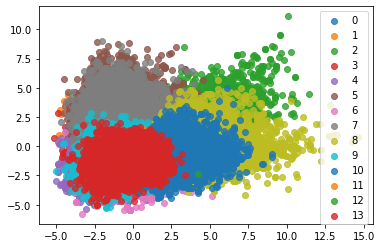

In [134]:
plt.figure()
colors = plt.cm.get_cmap("twilight")

#colormaps to try 
# gist_ncar
# tab20c

lw = 1

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], alpha=0.8, lw=lw, label=target_name, cmap="twilight"
    )
# plt.ylim(-2,2)
plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("First Two Components from PCA of {} dataset".format(datasetslist[use_dataset]))
plt.set_cmap("twilight")

plt.show()


In [135]:
#sentences.index(filter_sentences[0])
filter_sentences=[x  for x in sentences if "quadratic " in x]
indices=[sentences.index(i) for i in filter_sentences]

#for i in filter_sentences:
 #    indices.append(sentences.index(i))
print(len(indices))

uniq_list=[labels[i] for i in indices]
np.unique(uniq_list)


133


array(['10_Maths_jemh102', '10_Maths_jemh104', '10_Maths_jemh1a1',
       '10_Maths_jemh1ps', '11_Maths_kemh104', '11_Maths_kemh105',
       '11_Maths_kemh108', '11_Maths_kemh1a1', '11_Physics_2_keph205',
       '11_Physics_keph102', '11_Physics_keph1an', '11_chem_kech106',
       '12_Maths_2_lemh201', '9_Maths_iemh102'], dtype='<U20')

In [39]:
dataset=tf.data.Dataset.from_tensor_slices(sentences)
#Display the rows and check 
for row in dataset.take(10):
        print(type(row))
        print(row)

In [137]:
import pickle
with open('text_corpus.pkl', 'wb') as f:
       pickle.dump(sentences, f)


In [139]:
clust_df.to_csv('clust_df.csv')